Importing Libraries

In [85]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

Loading Train Set

In [86]:
df_train = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Random Forest\datasets\telemetry train data.csv')
df_train.head()

,scaled__Account length,scaled__Area code,scaled__Number vmail messages,scaled__Total day minutes,scaled__Total day calls,scaled__Total eve minutes,scaled__Total eve calls,scaled__Total night minutes,scaled__Total night calls,scaled__Total intl minutes,...,encoded__State_VT,encoded__State_WA,encoded__State_WI,encoded__State_WV,encoded__State_WY,encoded__International plan_No,encoded__International plan_Yes,encoded__Voice mail plan_No,encoded__Voice mail plan_Yes,remainder__Churn
0,1.837756,-0.535023,1.983109,-0.104002,-0.629192,-0.254049,-1.902520,-1.194073,-0.276436,0.086097,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False
1,0.069707,-0.698831,1.763891,-0.273625,1.187956,0.279870,-0.420542,-0.512699,-0.678318,1.349113,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False
2,0.020594,-0.698831,-0.574437,1.770782,1.235775,-0.467616,-1.161531,-0.958365,-1.130436,1.735035,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
3,0.438050,-0.535023,-0.574437,-0.841417,0.518480,-0.151294,0.161663,-0.780099,1.984154,0.086097,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
4,0.585388,1.688092,-0.574437,1.045866,0.279382,-1.485085,1.061435,1.008508,0.527330,0.366767,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False


In [87]:
x = df_train.drop('remainder__Churn', axis=1)
y = df_train['remainder__Churn']

In [88]:
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [89]:
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=500, max_depth=15, min_samples_split=5, min_samples_leaf=2, class_weight='balanced', random_state=42))
])

In [90]:
rf_pipe.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('rf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float

In [91]:
y_val_pred = rf_pipe.predict(x_validate) 

In [92]:
val_ac_validate = accuracy_score(y_validate, y_val_pred)
print("Accuracy Score:", val_ac_validate)

Accuracy Score: 0.8878504672897196


In [93]:
cv = cross_validate(rf_pipe, x_train, y_train, cv=4)
cv

{'fit_time': array([0.48263478, 0.49285483, 0.45277071, 0.44865584]),
 'score_time': array([0.03198528, 0.03749585, 0.03137255, 0.02855515]),
 'test_score': array([0.86915888, 0.88785047, 0.91509434, 0.88679245])}

In [94]:
CM_val = confusion_matrix(y_validate, y_val_pred)
CM_val = pd.DataFrame(CM_val)
CM_val

,0,1
0,89,3
1,9,6


In [95]:
CR_val = classification_report(y_validate, y_val_pred, output_dict=True)
CR_val = pd.DataFrame(CR_val)
CR_val

,False,True,accuracy,macro avg,weighted avg
precision,0.908163,0.666667,0.88785,0.787415,0.874309
recall,0.967391,0.400000,0.88785,0.683696,0.887850
f1-score,0.936842,0.500000,0.88785,0.718421,0.875603
support,92.000000,15.000000,0.88785,107.000000,107.000000


Loading Test Set

In [96]:
df_test = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Random Forest\datasets\telemetry test data.csv')
df_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,MN,155,408,Yes,No,0,250.8,146,152.5,105,148.1,104,10.0,5,2,False
1,OR,81,415,No,No,0,324.7,48,236.4,82,187.6,78,13.1,5,0,True
2,AZ,48,415,No,Yes,27,141.1,109,224.7,94,174.3,122,13.2,2,1,False
3,NE,67,415,No,Yes,41,174.7,86,160.6,93,155.3,108,13.4,1,0,False
4,MI,51,415,No,No,0,229.7,129,336.0,104,192.8,128,9.6,1,1,True


In [97]:
preprocessor = joblib.load(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Random Forest\datasets\preprocessor.pkl')

In [98]:
test_clean = preprocessor.transform(df_test)

In [99]:
test_clean.head()

,scaled__Account length,scaled__Area code,scaled__Number vmail messages,scaled__Total day minutes,scaled__Total day calls,scaled__Total eve minutes,scaled__Total eve calls,scaled__Total night minutes,scaled__Total night calls,scaled__Total intl minutes,...,encoded__State_VT,encoded__State_WA,encoded__State_WI,encoded__State_WV,encoded__State_WY,encoded__International plan_No,encoded__International plan_Yes,encoded__Voice mail plan_No,encoded__Voice mail plan_Yes,remainder__Churn
0,1.272963,-0.698831,-0.574437,1.242272,2.144349,-1.009595,0.214591,-1.007884,0.225918,-0.089322,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,False
1,-0.544200,-0.535023,-0.574437,2.561762,-2.541979,0.680814,-1.002748,-0.225492,-1.080201,0.998275,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,True
2,-1.354556,-0.535023,1.398527,-0.716431,0.375021,0.445083,-0.367615,-0.488930,1.130153,1.033359,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False
3,-0.887987,-0.535023,2.421546,-0.116500,-0.724832,-0.846397,-0.420542,-0.865271,0.426859,1.103527,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False
4,-1.280887,-0.535023,-0.574437,0.865529,1.331415,2.687544,0.161663,-0.122494,1.431565,-0.229657,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,True


Test Set Feature Selection

In [100]:
x_test = test_clean.drop('remainder__Churn', axis=1)
y_test = test_clean['remainder__Churn']

In [101]:
y_rf_test = rf_pipe.predict(x_test) 

In [102]:
rf_ac_test = accuracy_score(y_test, y_rf_test)
print("Accuracy Score:", rf_ac_test)

Accuracy Score: 0.917910447761194


In [103]:
CM_rf_test = confusion_matrix(y_test, y_rf_test)
CM_rf_test = pd.DataFrame(CM_rf_test)
CM_rf_test

,0,1
0,115,0
1,11,8


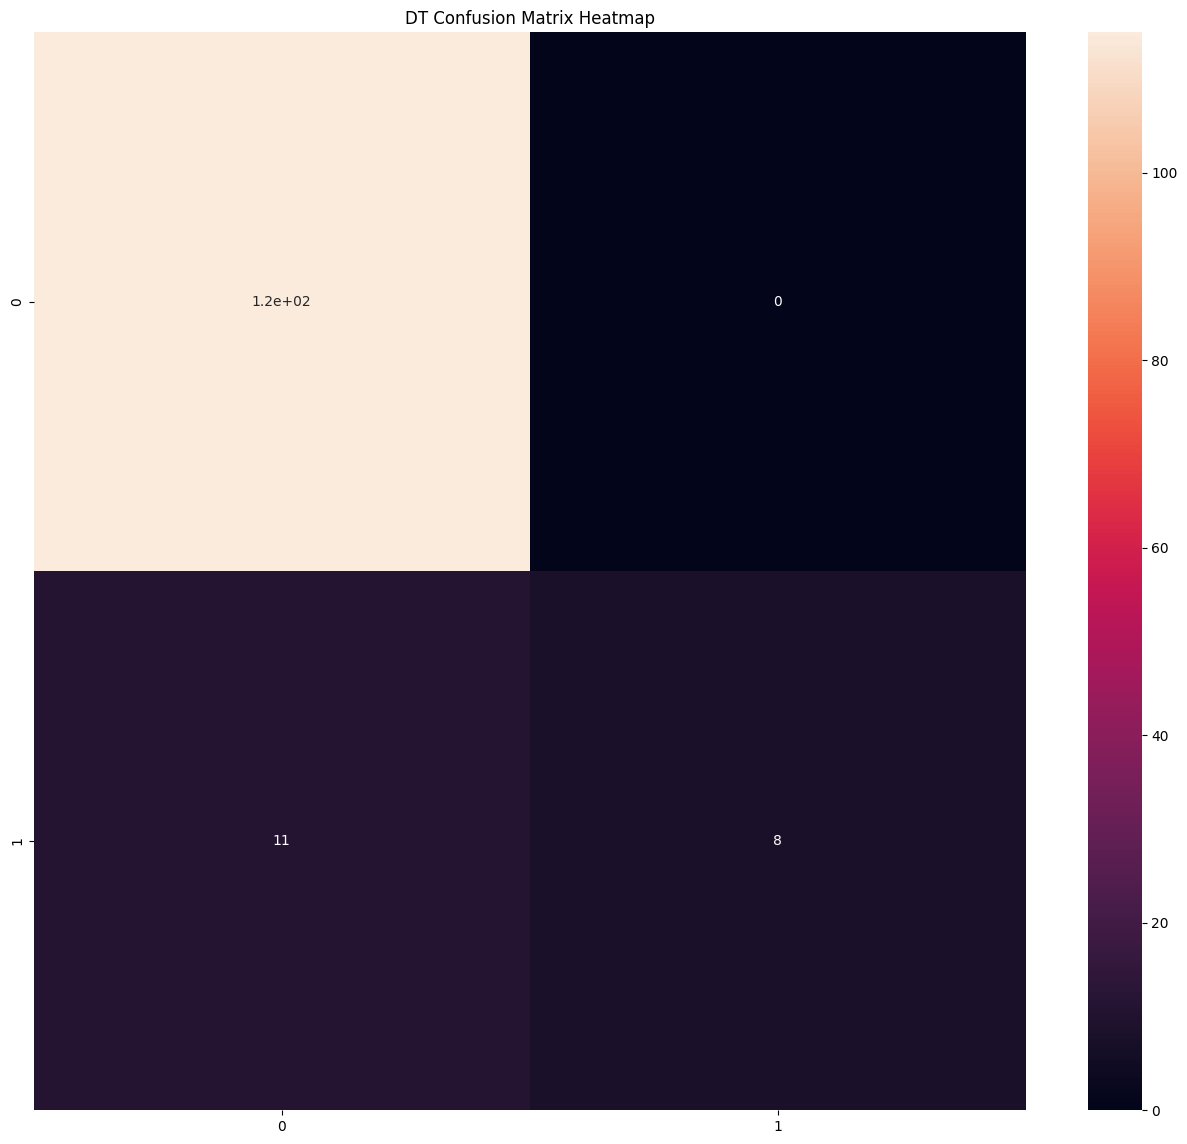

In [104]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CM_rf_test, annot=True)
plt.title('DT Confusion Matrix Heatmap')
plt.show()

In [105]:
CR_rf_test = classification_report(y_test, y_rf_test, output_dict=True)
CR_rf_test = pd.DataFrame(CR_rf_test)
CR_rf_test

,False,True,accuracy,macro avg,weighted avg
precision,0.912698,1.000000,0.91791,0.956349,0.925077
recall,1.000000,0.421053,0.91791,0.710526,0.917910
f1-score,0.954357,0.592593,0.91791,0.773475,0.903062
support,115.000000,19.000000,0.91791,134.000000,134.000000


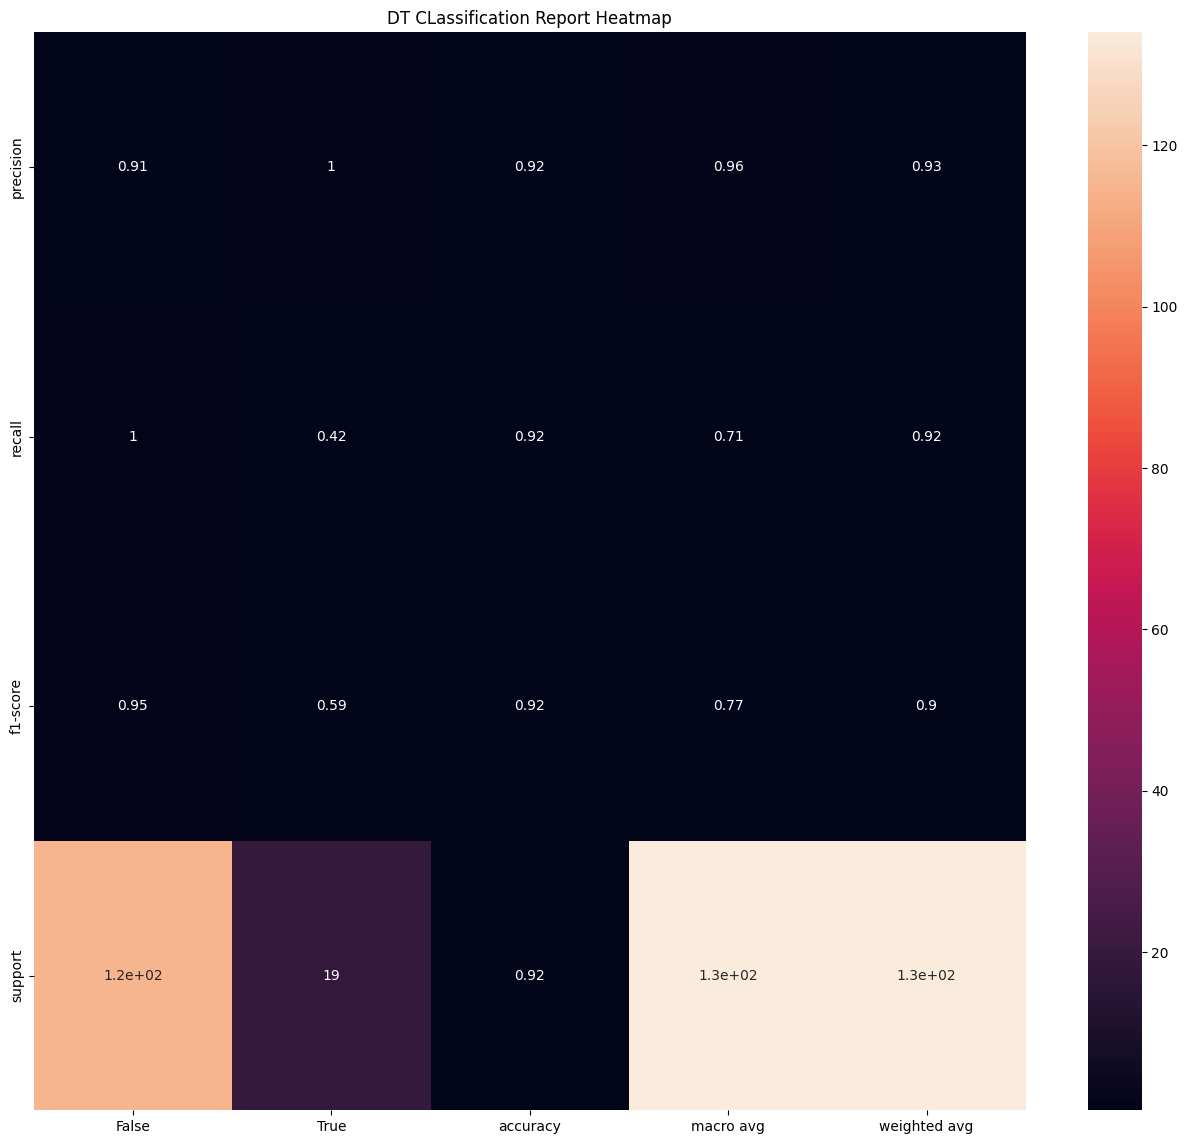

In [106]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR_rf_test, annot=True)
plt.title('DT CLassification Report Heatmap')
plt.show()

In [107]:
joblib.dump(rf_pipe, 'model.pkl')

['model.pkl']